## Observations and Insights 

In [58]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
# Checking the number of mice.
mice_group = combined_data.groupby("Mouse ID")
mice_number = mice_group["Mouse ID"].count()
mice_number

Mouse ID
a203    10
a251    10
a262    10
a275    10
a366     7
        ..
z435     3
z578    10
z581    10
z795    10
z969    10
Name: Mouse ID, Length: 249, dtype: int64

In [60]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = combined_data[combined_data.duplicated(["Mouse ID","Timepoint"])]
mice_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [61]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_all = combined_data[combined_data.duplicated(["Mouse ID",])]
mice_duplicate_all

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_data = combined_data.drop_duplicates("Mouse ID")
new_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [63]:
# Checking the number of mice in the clean DataFrame.
new_data["Mouse ID"].count()

249

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


# desc = combined_data.groupby(["Drug Regimen","Tumor Volume (mm3)"]).describe()
# desc

group_drug = combined_data.groupby("Drug Regimen")

mean = group_drug["Tumor Volume (mm3)"].mean()
median = group_drug["Tumor Volume (mm3)"].median()
variance = group_drug["Tumor Volume (mm3)"].var()
standard_deviation = group_drug["Tumor Volume (mm3)"].std()
SEM = group_drug["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean":mean,
                           "Median":median,
                           "Variance":variance,
                           "Standard Deviation":standard_deviation,
                           "SEM":SEM
                           })

summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [65]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
group_drug.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std","sem"],})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

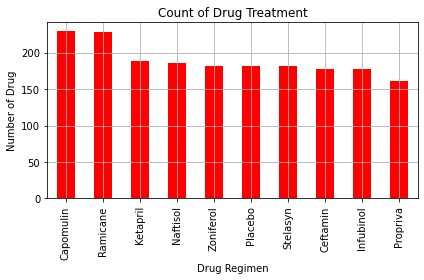

In [66]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_count = combined_data["Drug Regimen"].value_counts()
drug_count.plot(kind="bar", color = "red")

plt.title("Count of Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Drug")
plt.grid()

plt.tight_layout()
plt.show()

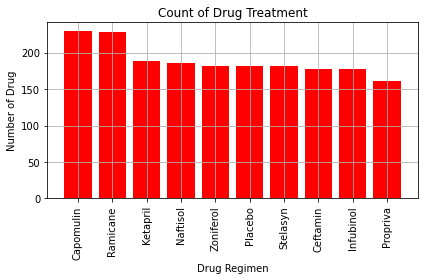

In [67]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_count = combined_data["Drug Regimen"].value_counts()
x_axis = np.arange(len(drug_count))
plt.bar(x_axis, drug_count, color="red", align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_count.index.values)
plt.xticks(rotation = 90)

plt.title("Count of Drug Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Drug")
plt.grid()

plt.tight_layout()
plt.show()

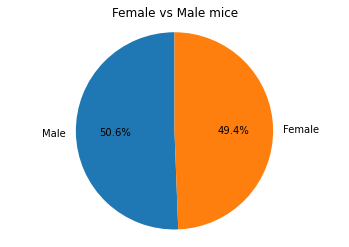

In [68]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_data = combined_data["Sex"].value_counts()
mice_data.plot(kind="pie", autopct="%1.1f%%", startangle=90,title="Female vs Male mice")

plt.xlabel("")
plt.ylabel("")
plt.axis("equal")
plt.show()

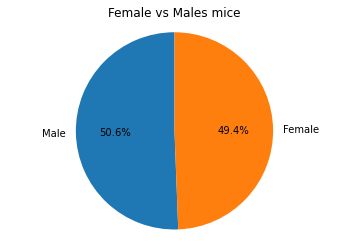

In [69]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_data = combined_data["Sex"].value_counts()
plt.pie(mice_data, autopct="%1.1f%%", startangle=90, labels = mice_data.index.values)

plt.title("Female vs Males mice")
plt.xlabel("")
plt.ylabel("")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = pd.DataFrame(combined_data.groupby("Mouse ID")["Timepoint"].max())
max_timepoint = max_timepoint.rename(columns={"Timepoint":"Max Timepoint"})
max_timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_data = pd.merge(combined_data, max_timepoint, how='outer', on='Mouse ID')
merged_data.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
5,k403,Ramicane,Male,21,16,25,33.464577,1,45
6,k403,Ramicane,Male,21,16,30,31.099498,1,45
7,k403,Ramicane,Male,21,16,35,26.546993,1,45
8,k403,Ramicane,Male,21,16,40,24.365505,1,45
9,k403,Ramicane,Male,21,16,45,22.050126,1,45


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    
    # add subset 
    treat_df = merged_data.loc[merged_data["Drug Regimen"] == treatment]
    max_df = treat_df.loc[treat_df["Timepoint"] == treat_df["Max Timepoint"]]
    volume = max_df["Tumor Volume (mm3)"]
    tumor_vol.append(volume)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    print(f"{treatment}'s IQR : {iqr}")
    print(f"Outliers of {treatment} : Data between Lower bound {lower_bound} & Upper bound {upper_bound}")

Capomulin's IQR : 7.781863460000004
Outliers of Capomulin : Data between Lower bound 20.70456164999999 & Upper bound 51.83201549
Ramicane's IQR : 9.098536719999998
Outliers of Ramicane : Data between Lower bound 17.912664470000003 & Upper bound 54.30681135
Infubinol's IQR : 11.477135160000003
Outliers of Infubinol : Data between Lower bound 36.83290494999999 & Upper bound 82.74144559000001
Ceftamin's IQR : 15.577752179999997
Outliers of Ceftamin : Data between Lower bound 25.355449580000002 & Upper bound 87.66645829999999


<ipython-input-104-0e69ec49c579>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


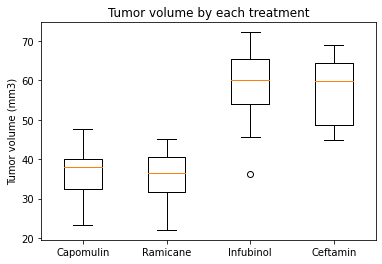

In [104]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
ax1 = plt.figure().subplots()

ax1.set_title("Tumor volume by each treatment")
ax1.set_ylabel("Tumor volume (mm3)")
ax1.set_xticklabels(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

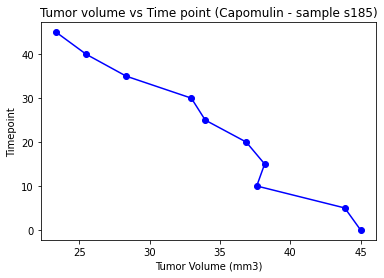

In [120]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
new_df = combined_data.loc[combined_data["Drug Regimen"]== "Capomulin"]
#new_df['Mouse ID'].value_counts()

sample_mouse = new_df.loc[new_df["Mouse ID"]=="s185"]

plt.plot(sample_mouse['Tumor Volume (mm3)'], sample_mouse['Timepoint'], marker ='o', color='blue')

plt.title("Tumor volume vs Time point (Capomulin - sample s185)")
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Timepoint")

plt.show()

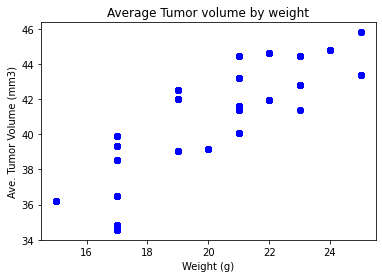

In [138]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

ave_vol = pd.DataFrame(new_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean())
ave_vol = ave_vol.rename(columns={"Tumor Volume (mm3)":"Average Tumor Volume"})

# Merge ave_vol with the new_df
merged_data = pd.merge(new_df, ave_vol, how='outer', on='Mouse ID')

plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume'], marker ='o', color ='blue')

plt.title("Average Tumor volume by weight")
plt.xlabel("Weight (g)")
plt.ylabel("Ave. Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

The correlation between weight and average tumor volume for the Capomulin regimen is 0.83


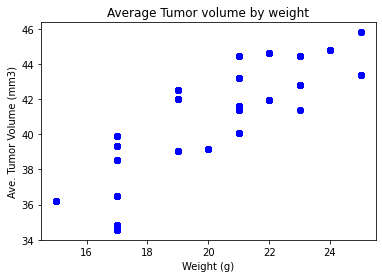

In [139]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(merged_data['Weight (g)'], merged_data['Average Tumor Volume'])
plt.scatter(merged_data['Weight (g)'], merged_data['Average Tumor Volume'], marker ='o', color ='blue')

plt.title("Average Tumor volume by weight")
plt.xlabel("Weight (g)")
plt.ylabel("Ave. Tumor Volume (mm3)")

print(f"The correlation between weight and average tumor volume for the Capomulin regimen is {round(correlation[0],2)}")
plt.show()


y = 0.96x + 21.49
The r-squared is: 0.6962164535925288


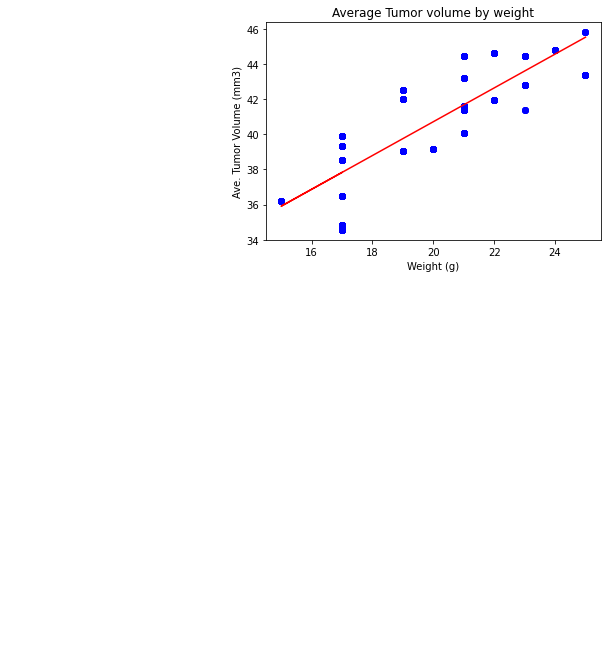

In [140]:
# Linear regression

x_values = merged_data['Weight (g)']
y_values = merged_data['Average Tumor Volume']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values,marker ='o', color = 'blue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Average Tumor volume by weight")
plt.xlabel("Weight (g)")
plt.ylabel("Ave. Tumor Volume (mm3)")

print(f"The r-squared is: {rvalue**2}")

plt.show()